In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as _sum

In [3]:
spark = SparkSession.builder.appName("ContinentRevenue").getOrCreate()

In [17]:
# Update the paths below
sales_path =r"C:\Users\farit\Downloads\retail_sales.csv"
continent_path =r"C:\Users\farit\Downloads\countries by continent.csv"

In [18]:
sales_df = spark.read.csv(sales_path, header=True, inferSchema=True)
continent_df = spark.read.csv(continent_path, header=True, inferSchema=True)

In [19]:
# Revenue calculation
sales_df = sales_df.withColumn("Revenue", col("Unit Price") * col("Units Sold"))

In [20]:
# Rename columns for join
sales_df = sales_df.withColumnRenamed("Country", "country")
continent_df = continent_df.withColumnRenamed("Country", "country").withColumnRenamed("Continent", "continent")

In [21]:
# Join and aggregate
joined_df = sales_df.join(continent_df, on="country", how="inner")
continent_revenue_df = joined_df.groupBy("continent").agg(_sum("Revenue").alias("Total_Revenue"))
continent_revenue_df.orderBy("continent").show(truncate=False)

+-------------+-------------+
|continent    |Total_Revenue|
+-------------+-------------+
|Asia         |1100         |
|Europe       |600          |
|North America|1600         |
+-------------+-------------+



In [22]:
continent_revenue_pd = continent_revenue_df.toPandas()

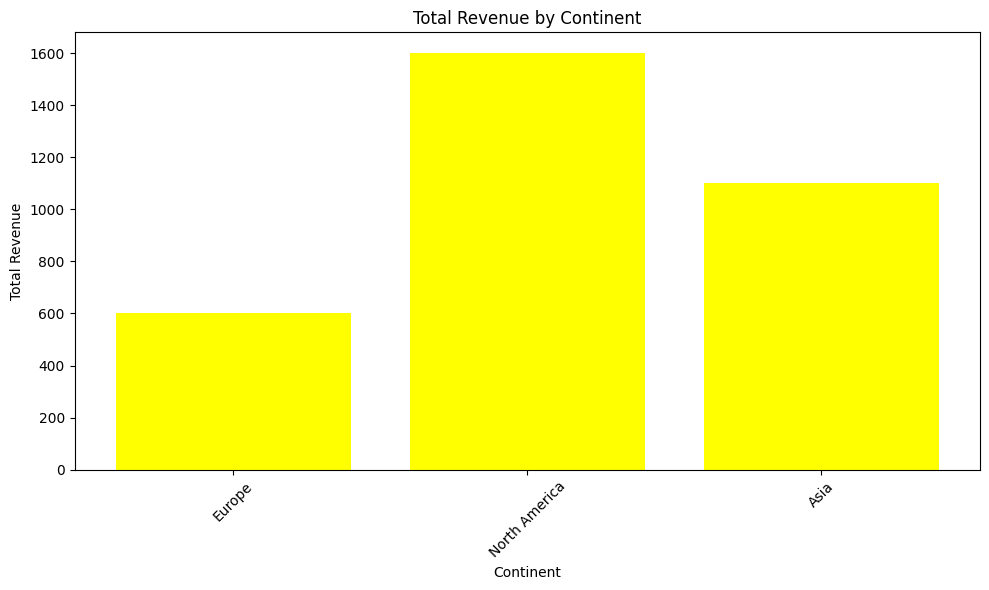

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(continent_revenue_pd['continent'], continent_revenue_pd['Total_Revenue'], color='yellow')
plt.xlabel("Continent")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Continent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


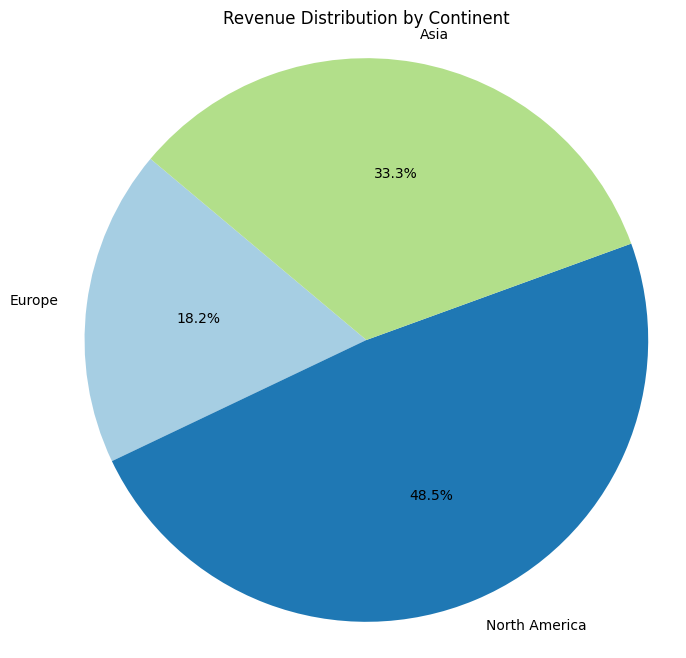

In [26]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(continent_revenue_pd['Total_Revenue'], 
        labels=continent_revenue_pd['continent'], 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Revenue Distribution by Continent")
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()


C:\Users\farit\AppData\Local\Temp\ipykernel_13340\817069953.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Revenue', y='continent', data=continent_revenue_pd, palette='viridis')


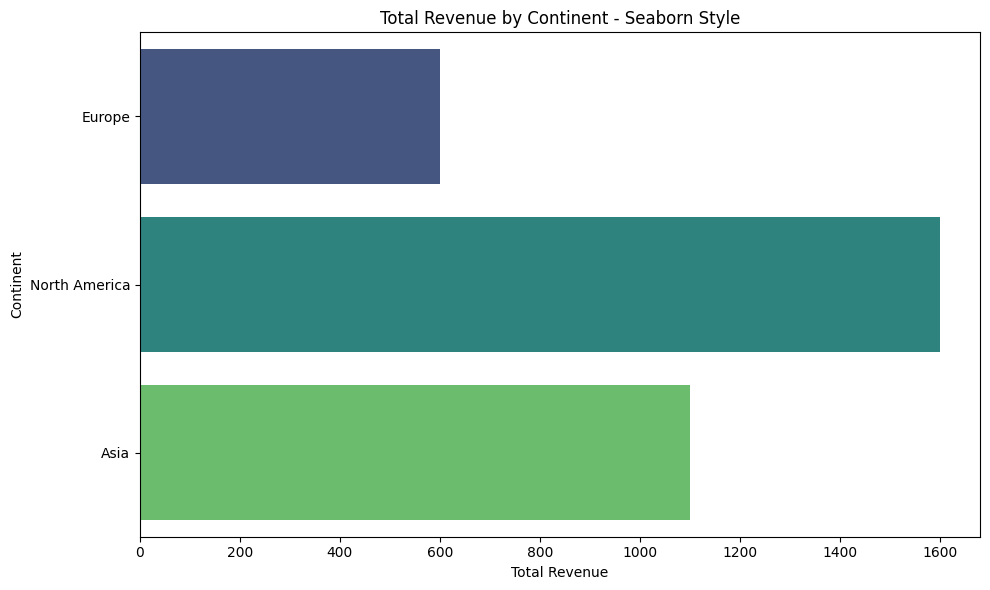

In [27]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Revenue', y='continent', data=continent_revenue_pd, palette='viridis')
plt.xlabel("Total Revenue")
plt.ylabel("Continent")
plt.title("Total Revenue by Continent - Seaborn Style")
plt.tight_layout()
plt.show()